# ALGORITMOS GENÉTICOS (AGs)

Algoritmos genéticos são algoritmos de aprendizado e otimização baseados na teoria da evolução de Charles Darwin. Um AG é programado para representar cada indivíduo como uma possível solução a um problema, e os operadores do modelo são capazes de produzir indivíduos cada vez melhores a cada geração, convergindo para uma solução de ótimo global. Uma vantagem deste tipo de algoritmo é a capacidade de realizar mutações, permitindo assim que a solução escape de um ótimo local, solucionando uma das maiores fraquezas de um modelo de Rede Neural.

Neste algoritmo está definido o passo a passo para a implementação de um Algoritmo Genético para a otimização de uma função, conforme apresentado abaixo:

### 1). IMPORTAÇÃO DAS BIBLIOTECAS E DO DATASET

In [248]:
# Importação das Bibliotecas
import numpy as np
from matplotlib import pyplot as plt

# Importação do Dataset
x1 = [0, 0, 0, 0, 0.3, 0.3, 0.3, 0.3, 0.5, 0.5, 0.5, 0.5, 0.75, 0.75, 0.75, 0.75, 1, 1, 1, 1]
x2 = [0, 0.27, 0.71, 1, 0, 0.27, 0.71, 1, 0, 0.27, 0.71, 1, 0, 0.27, 0.71, 1, 0, 0.27, 0.71, 1]
y = [1, 0.78, 0.75, 0.72, 0.72, 0.7, 0.45, 0.42, 0.64, 0.42, 0.36, 0.33, 0.33, 0.31, 0.28, 0.22, 0.11, 0.08, 0.03, 0]

### 2). INICIALIZAÇÃO E GERAÇÃO ZERO

O primeiro passo é definir a função que se deseja otimizar, nesse caso para exemplificar foi escolhida otimizar uma função no formato:

$$
   y = a_1 + a_2*x_1 + a_3*x_2
$$

Sendo assim a sua função fitness um cálculo dedicado para diminuir o valor do MSE (Mean Squared Error) dessa variável Todo o algoritmo será organizado no formato de um dicionário com duas chaves, a primeira se referindo ao valor dos pesos e a segunda ao valor de sua avaliação.

O primeiro passo é definir o número de indivíduos (tamanho da população), o número de genes que cada indivíduo pssui (número de variáveis a serem analisadas) e os valores máximos e mínimos que cada uma dessas variáveis podem tomar. Nessa construção do Algoritmo Genético cada gene será representado por um número real, porém uma possibilidade seria utilizar genes binarizados.

In [249]:
# Definição dos Hiperparâmetros
população = {}           # Local de armazenamento para cada indivíduo (dicionário)
gerações = []            # Lista de armazenamento de todas as gerações
melhor_avaliação = []    # Lista de armazenamento da maior avaliação de cada geração

n_gerações = 500         # Número de gerações desejadas
tam_população = 8        # Tamanho da população (número de indivíduos)
n_genes = 3              # Número de genes de cada indivíduo (quantidade de variáveis)
valor_min = -1           # Limite inferior para geração aleatória
valor_max = 1            # Limite superior para geração aleatória
taxa_mutação = 0.05      # Taxa de mutação 


# Declaração da função fitness (tem como ojetivo realizar a minimização do MSE através do ajuste dos pesos)
# Entrada: x = população[i]['pesos']
def fitnessTStr(x):
    y_predito = []
    for i in range(20):
        y_predito.append(x[0] + x[1] * x1[i] + x[2] * x2[i])
    TStr_real = y
    return 1/np.square(np.subtract( TStr_real, y_predito)).mean()


# Criação da população inicial, cada indivíduo possui seus pesos e sua avaliação
for i in range(tam_população):
	população[i] = {'pesos': None, 'avaliação': None}
for i in range(tam_população):
	população[i]['pesos'] = np.random.uniform(valor_min, valor_max, n_genes)
	população[i]['avaliação'] = fitnessTStr(população[i]['pesos'])

população

{0: {'pesos': array([0.05694452, 0.3342628 , 0.32217835]),
  'avaliação': 5.356189950874481},
 1: {'pesos': array([-0.55612103, -0.37299052, -0.13231344]),
  'avaliação': 0.6375210839490328},
 2: {'pesos': array([ 0.66169753, -0.95375733, -0.29458788]),
  'avaliação': 5.80703954322968},
 3: {'pesos': array([6.98215121e-01, 3.47362127e-01, 1.46059447e-04]),
  'avaliação': 2.8741180474033863},
 4: {'pesos': array([0.49138202, 0.80385154, 0.81477347]),
  'avaliação': 0.8275806515300022},
 5: {'pesos': array([ 0.71224515, -0.66756414,  0.85087059]),
  'avaliação': 3.2930133745645382},
 6: {'pesos': array([ 0.03576922,  0.34708342, -0.40669579]),
  'avaliação': 3.054917709094391},
 7: {'pesos': array([0.86949639, 0.54599861, 0.89436985]),
  'avaliação': 0.5791016036487474}}

##### REPRESENTAÇÃO VISUAL DA GERAÇÃO ZERO

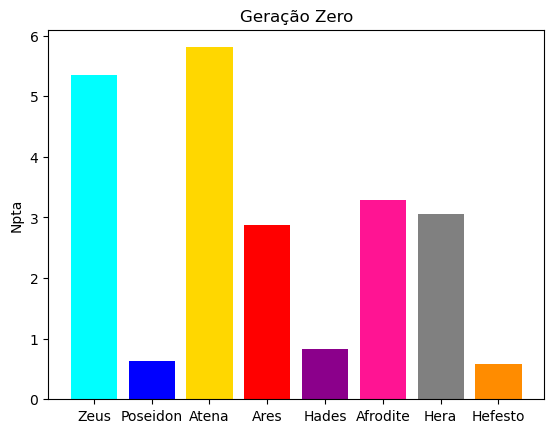

In [250]:
Geração0 = ('Zeus', 'Poseidon', 'Atena', 'Ares', 'Hades', 'Afrodite', 'Hera', 'Hefesto')
notas = []
for i in range(tam_população):
    notas.append(população[i]['avaliação'])
plt.bar(np.arange(len(Geração0)), notas, color=['cyan', 'blue', 'gold', 'red', 'darkmagenta', 'deeppink', 'grey', 'darkorange'])
plt.xticks(np.arange(len(Geração0)), Geração0)
plt.ylabel('Npta')
plt.title('Geração Zero')
plt.show()

### 3). SELEÇÃO DOS PAIS

Existem diferentes métodos podem ser utilizados para a escolha dos pais, dentre elas o elitismo, o torneio ou a roda da fortuna. Neste algoritmo o último citado será utilizado. O método da roda da fortuna é considerado o mais eficiente, por isso é amplamente utilizado. Neste método cria-se uma roleta na qual cada individuo ocupa um espaço equivalente a sua avaliação e sorteia-se um número para simular uma rodada da roda da fortuna.

##### MÉTODO DA RODA DA FORTUNA

In [251]:
# Função que determina a Roda da Fortuna
# Entrada: x = probabilidade
# Saída: atua como um índice, logo: população[roda_da_fortuna(probabilidade)]
def roda_da_fortuna(x):
   c = np.cumsum(x)
   r = sum(x) * np.random.rand()
   ind = np.argwhere(r <= c)
   return ind[0][0]


# Cálculo da probabilidade de cada indivíduo ser escolhido na roda da fortuna
custos = []
for i in range(tam_população):
   custos.append(população[i]['avaliação'])
custo_medio = np.mean(custos)
if custo_medio != 0:
   custos = custos/custo_medio
probabilidade = np.exp(-1*custos)

##### REPRESENTAÇÃO VISUAL DA RODA DA FORTUNA

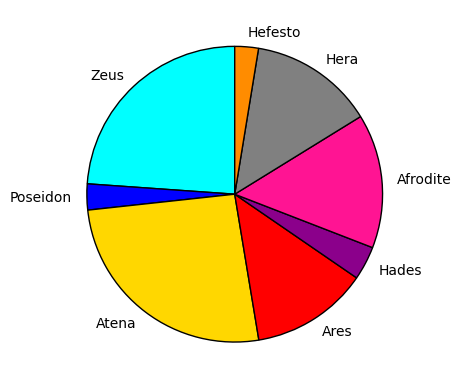

In [252]:
tamanhos = []
for i in range(tam_população):
    tamanhos.append(população[i]['avaliação']/np.sum(notas))

plt.pie(tamanhos, labels=Geração0, startangle=90, colors=['cyan', 'blue', 'gold', 'red', 'darkmagenta', 'deeppink', 'grey', 'darkorange'], 
wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.show()

#### MÉTODO DO ELITISMO

Este método pode ser explicado como um operador relacionado ao melhor indivíduo de uma geração, nesta implementação de AG um dos pais da próxima geração será sempre o melhor indivíduo da geração atual, porém também é possível utilizar este método de outras formas, como para a criação um clone do melhor indivíduo na próxima geração.

In [253]:
def elitismo(x):
    posição = 0
    melhor = 0
    for i in range(tam_população-1):
        if x[i]['avaliação'] > melhor:
            melhor = x[i]['avaliação']
            posição = i        
    return x[posição]

### 4). CROSSOVER (REPRODUÇÃO)

Após declarar a função a qual seleciona dois indivíduos, um por meio do método da roda da fortuna  e outro por meio do elitismo para serem os genitores, o próximo passo é realizar o crossover. O crossover se refere ao processo na qual ocorre a troca genética entre os dois indivíduos genitores. A próxima geração portanto herda as características genéticas dos dois pais.

No desenvolvimento deste código, será utilizada somente um único ponto de corte para definir a reprodução, neste método os cromossomos genitores serão cortados no exato mesmo ponto definido aleatoriamente e serão trocados para produzir dois novos cromossomos.

In [254]:
# Função que determina o Crossover
def crossover(pai1, pai2):
    corte = round(np.random.uniform(1, n_genes-1))
    filho1 = np.array(pai1['pesos'][0:corte])
    filho1 = np.append(filho1, pai2['pesos'][corte:])
    filho2 = np.array(pai2['pesos'][0:corte])
    filho2 = np.append(filho2, pai1['pesos'][corte:])
    return filho1, filho2


# Criação da nova geração à partir do crossover:
filhos = []
metade_população = int(tam_população/2)
for i in range(metade_população):
        pai1 = elitismo(população)
        pai2 = população[roda_da_fortuna(probabilidade)]
        filho1, filho2 = crossover(pai1, pai2)
        filhos.append(filho1)
        filhos.append(filho2)

### 5). MUTAÇÃO

Na genética, processo de mutação ocorre naturalmente devido a um erro de duplicação ou cópia de genes. Quando realizamos o crossover, nós replicamos os cromossomos pais ao misturar os genes de ambos os pais. A mutação nos cromossomos é necessária no algoritmo genético para aumentar a variabilidade genetica após o crossover.

Para a função mutação serão definidos dois parâmetros: o indivíduo na qual se deseja a mutação (filho) e a taxa de chance da mutação ocorrer (taxa_mutação). Este processo é realizado de tal forma que para cada gene no cromossomo um número aleatório entre 0 e 1 é gerado, e se esse número for menoe que a taxa de mutação determinada, o gene é subtituido por um novo valor gerado aleatóriamente com os mesmos critérios utilizados para a população original.

In [255]:
# Função que determina a mutação
# Entradas: filhos[i], 0.15)
def mutação(filho, taxa_mutação):
    mchild = np.array(filho)
    for i in range(n_genes):
        if np.random.uniform(0, 1) < taxa_mutação:
            mchild[i] = np.random.uniform(valor_min, valor_max)
    return mchild


# Mutação de todos os filhos gerados nesta geração:
filhos_mutados = []
for i in range(tam_população):
    filhos_mutados.append(mutação(filhos[i], 0.05))


# Criação e avaliação da nova população:
população = {}
for i in range(tam_população):
    população[i] = {'pesos': None, 'avaliação': None}
for i in range(tam_população):
    população[i]['pesos'] =filhos_mutados[i]
    população[i]['avaliação'] = fitnessTStr(população[i]['pesos'])

##### REPRESENTAÇÃO VISUAL DA GERAÇÃO 1

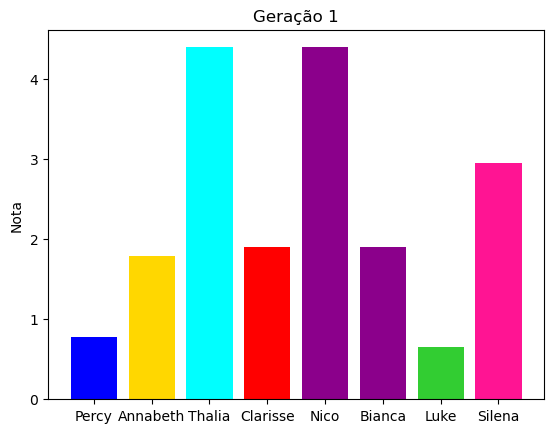

In [256]:
Geração1 = ('Percy', 'Annabeth', 'Thalia', 'Clarisse', 'Nico', 'Bianca', 'Luke', 'Silena')
notas = []
for i in range(tam_população):
    notas.append(população[i]['avaliação'])
plt.bar(np.arange(len(Geração1)), notas, color=['blue', 'gold', 'cyan', 'red', 'darkmagenta', 'darkmagenta', 'limegreen', 'deeppink'])
plt.xticks(np.arange(len(Geração1)), Geração1)
plt.ylabel('Nota')
plt.title('Geração 1')
plt.show()

### 6). AVALIAÇÃO DA GERAÇÃO

Após a mutação nós temos a nova geração completa, então por fim devemos avaliar o valor de fitness de cada indivíduo para assim ser possível definir o melhor indivíduo de cada geração.

In [257]:
# Função que determina a melhor avaliação da geração
# Entrada: x = população
def melhor_nota_da_geração(x):
    melhor = 0
    for i in range(tam_população):
        if x[i]['avaliação'] > melhor:
            melhor = população[i]['avaliação']
    return melhor


# Função que determina o indivíduo com a maior avaliação de uma geração
# Entrada: x = população
def melhor_individuo_da_geração(x):
    posição = 0
    melhor = 0
    for i in range(tam_população-1):
        if x[i]['avaliação'] > melhor:
            melhor = x[i]['avaliação']
            posição = i        
    return x[posição]

### IMPLEMENTAÇÃO DO ALGORITMO GENÉTICO

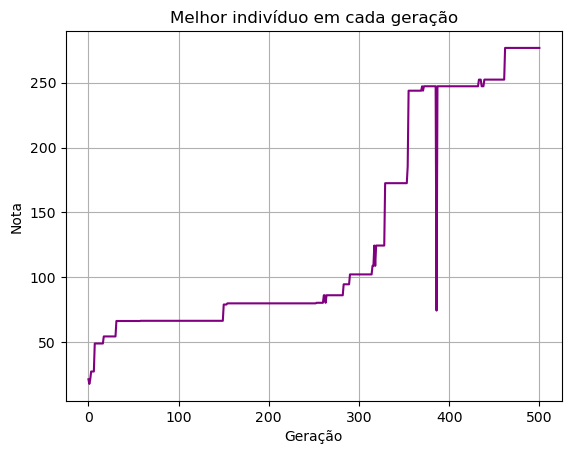

O melhor indivíduo se encontra na geração 462 e possui avaliação: 276.6794390046653
O melhor indivíduo encontrado é: [ 0.8718195  -0.69185393 -0.18351688]
O MSE deste indivíduo é de: 0.0036142909773036595


In [258]:
# Criação da população inicial, cada indivíduo possui seus pesos e sua avaliação
for i in range(tam_população):
	população[i] = {'pesos': None, 'avaliação': None}
for i in range(tam_população):
	população[i]['pesos'] = np.random.uniform(valor_min, valor_max, n_genes)
	população[i]['avaliação'] = fitnessTStr(população[i]['pesos'])

gerações.append(população)
melhor_avaliação.append(melhor_nota_da_geração(população))

for i in range(n_gerações):

	# Cálculo da probabilidade de cada indivíduo ser escolhido na roda
	custos = []
	for i in range(tam_população):
		custos.append(população[i]['avaliação'])
	custo_medio = np.mean(custos)
	if custo_medio != 0:
		custos = custos/custo_medio
	probabilidade = np.exp(-1*custos)

	# Criação da nova geração à partir do crossover:
	filhos = []
	metade_população = int(tam_população/2)
	for i in range(metade_população):
		pai1 = elitismo(população)
		pai2 = população[roda_da_fortuna(probabilidade)]
		filho1, filho2 = crossover(pai1, pai2)
		filhos.append(filho1)
		filhos.append(filho2)

	# Mutação de todos os filhos gerados nesta geração:
	filhos_mutados = []
	for i in range(tam_população):
		filhos_mutados.append(mutação(filhos[i], taxa_mutação))

	# Criação e avaliação da nova população:
	população = {}
	for i in range(tam_população):
		população[i] = {'pesos': None, 'avaliação': None}
	for i in range(tam_população):
		população[i]['pesos'] =filhos_mutados[i]
		população[i]['avaliação'] = fitnessTStr(população[i]['pesos'])

	gerações.append(população)
	melhor_avaliação.append(melhor_nota_da_geração(população))


# Plot do gráfico com a avaliação do melhor indivíduo de cada geração
abcissa = []
for i in range(0, len(gerações)):
    abcissa.append(i)
plt.plot(abcissa,melhor_avaliação, '-', color='purple')
plt.title('Melhor indivíduo em cada geração')
plt.xlabel('Geração')
plt.ylabel('Nota')
plt.grid()
plt.show()


# Print das respostas esperadas
melhor_geração = melhor_avaliação.index(max(melhor_avaliação))
melhor_individuo = (melhor_individuo_da_geração(gerações[melhor_geração]))
print('O melhor indivíduo se encontra na geração', melhor_geração, 'e possui avaliação:', max(melhor_avaliação))

x = np.array(melhor_individuo['pesos'])
y_predito = []
for i in range(20):
	y_predito.append(x[0] + x[1] * x1[i] + x[2] * x2[i])
TStr_real = y
MSE = np.square(np.subtract(TStr_real, y_predito)).mean()
print('O melhor indivíduo encontrado é:', np.array(melhor_individuo['pesos']))
print('O MSE deste indivíduo é de:', MSE)